# Decision Tree-2

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:
1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.
2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.
3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.
5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.
6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.
7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [1]:
# Importing Libaray
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

In [2]:
# Importing Datasets
url = 'https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2'
ds = pd.read_csv(url)
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Knowing the variable
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is **No missing values** in any column.
There is **NO Categorical Data Type**

In [4]:
# Statistics Summary
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


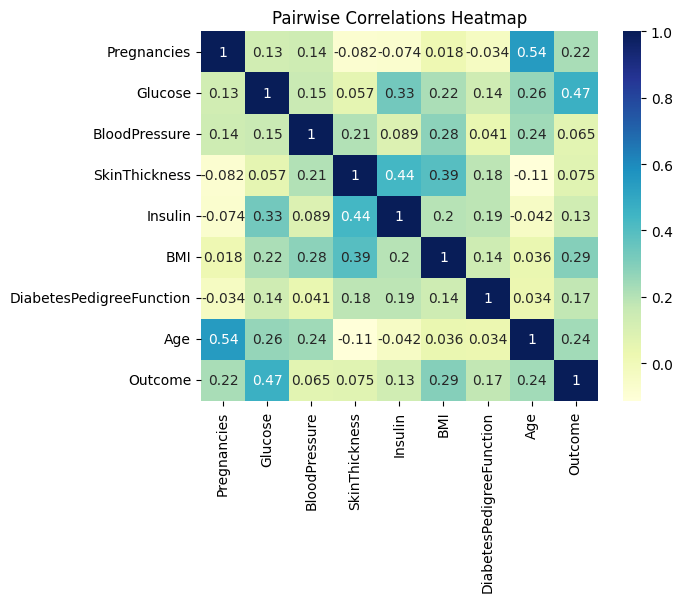

In [5]:
# Pairwise Correlations
matrix = ds.corr()
sb.heatmap(matrix, annot=True, cmap="YlGnBu")
pt.title("Pairwise Correlations Heatmap")
pt.show()

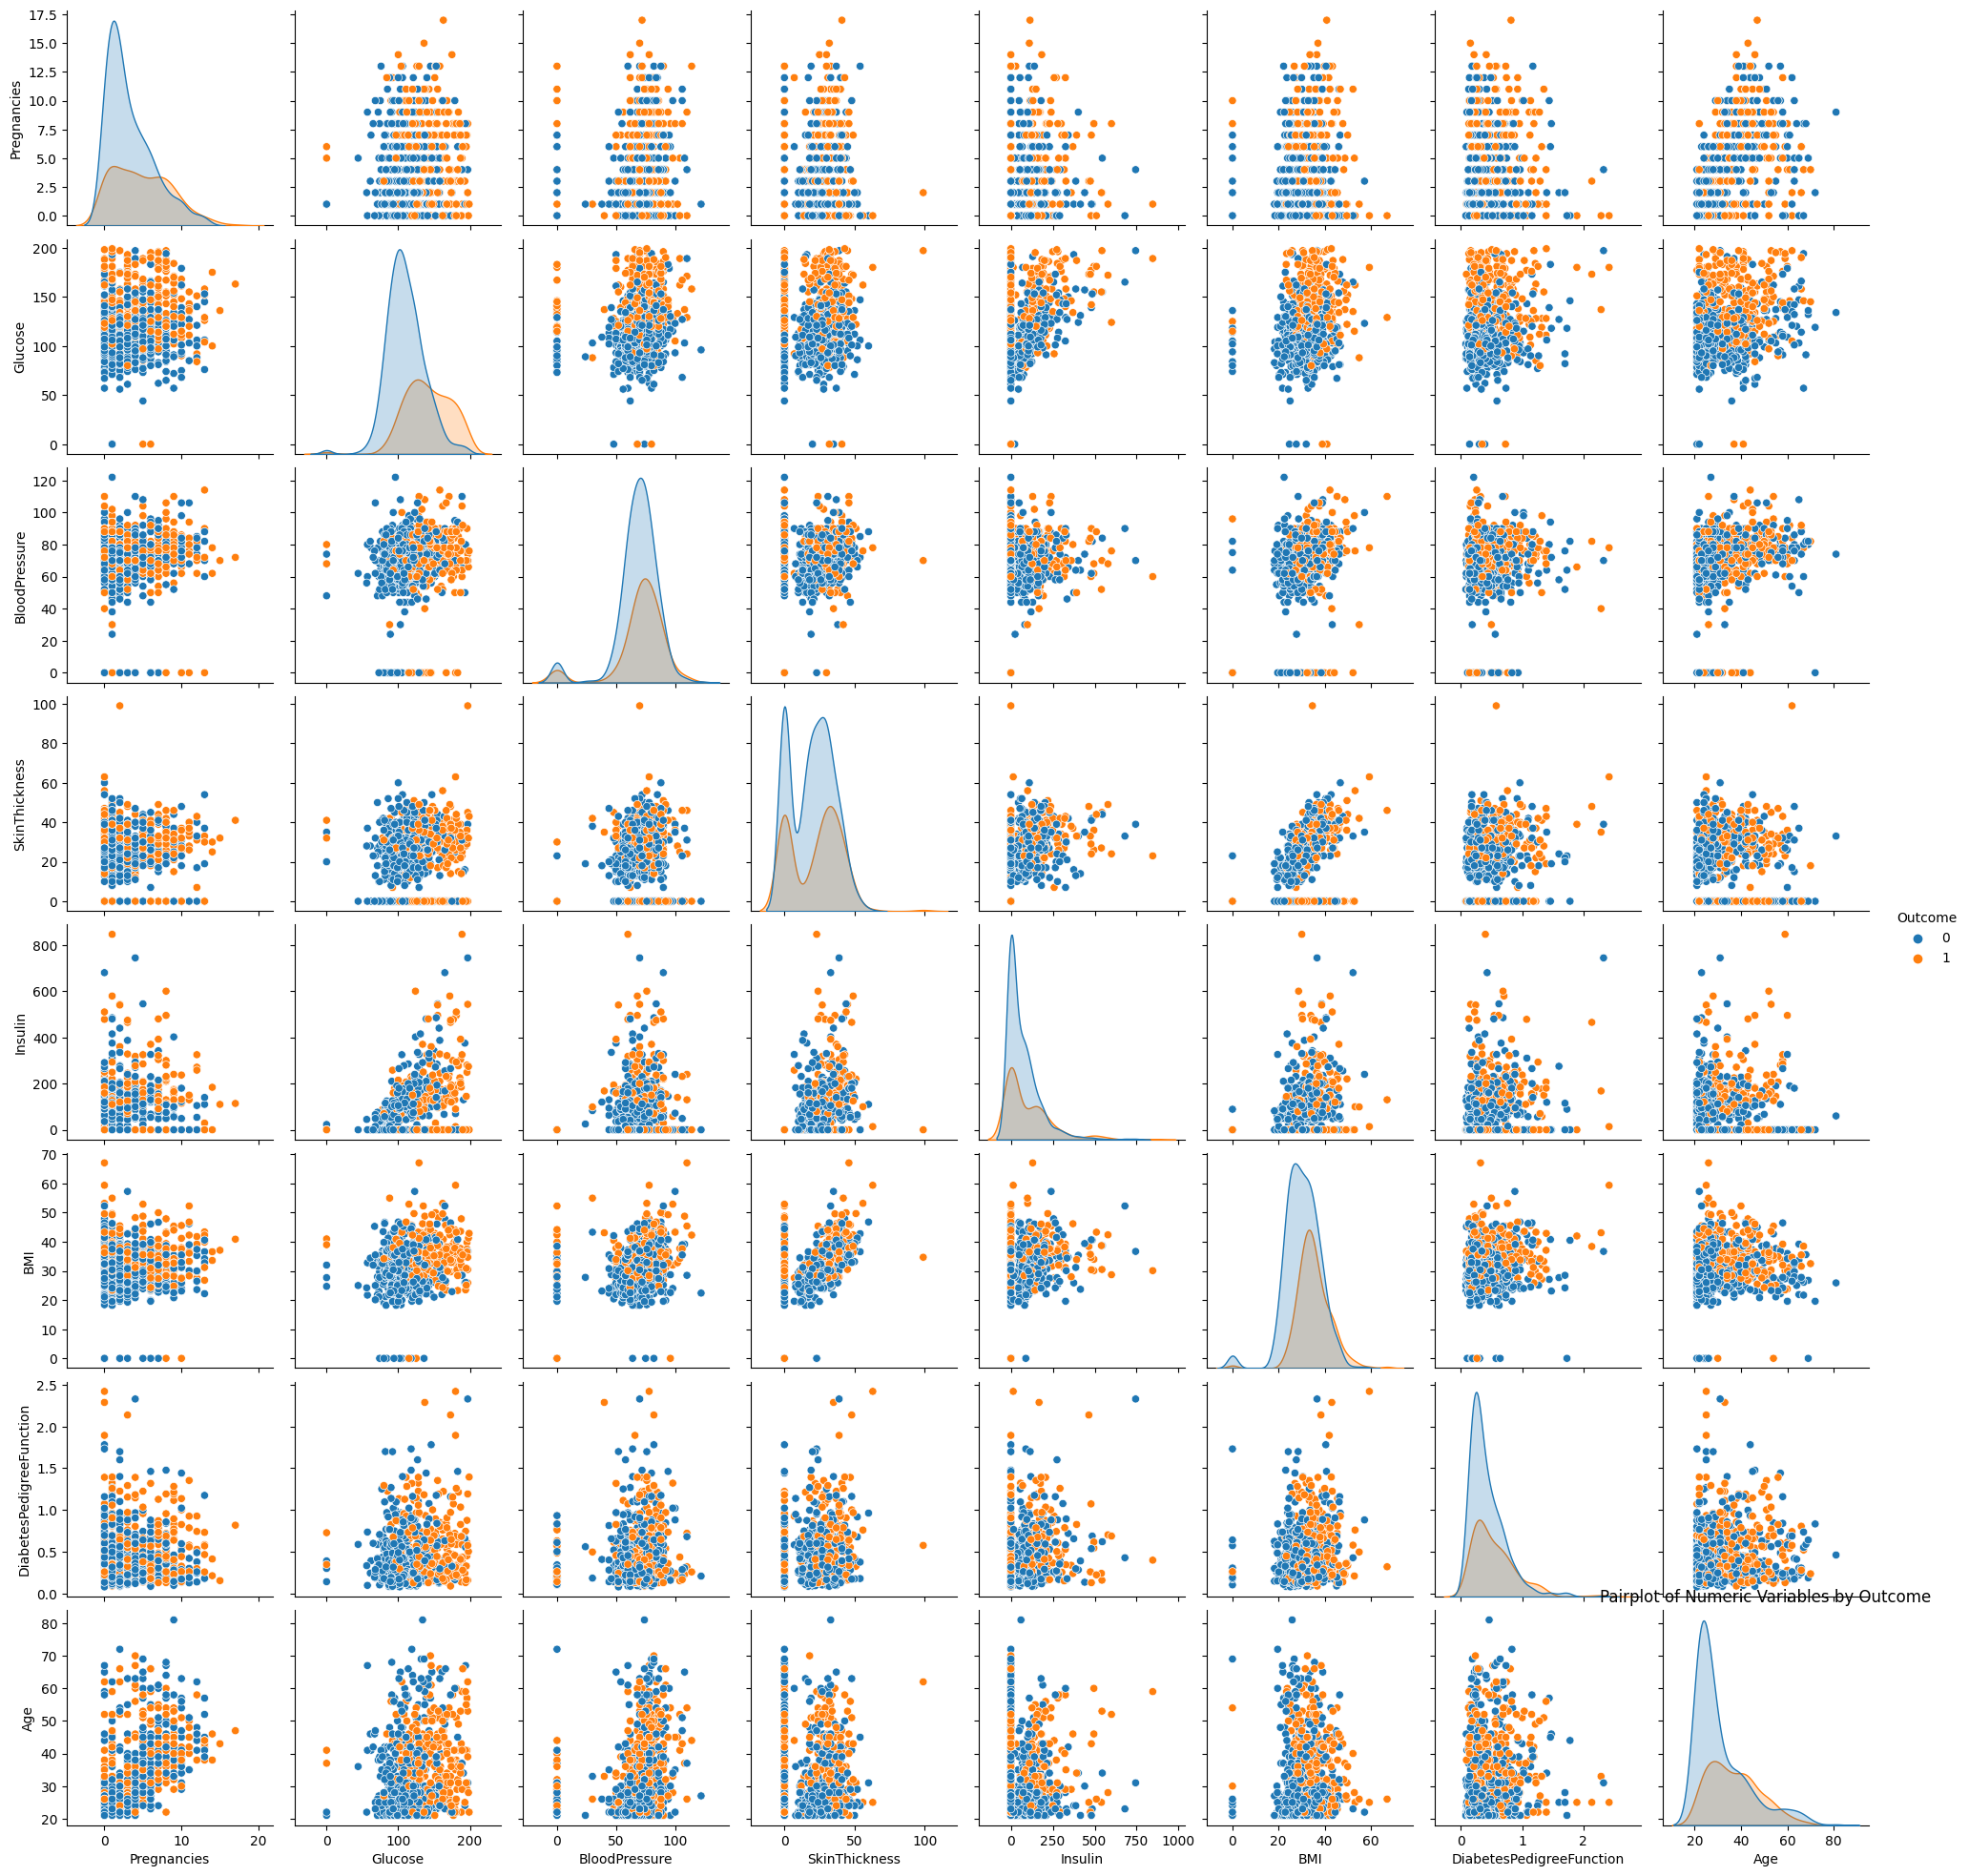

In [6]:
# Making a Pairplot for various columns
sb.pairplot(data = ds, hue='Outcome')
pt.title("Pairplot of Numeric Variables by Outcome")
pt.show()

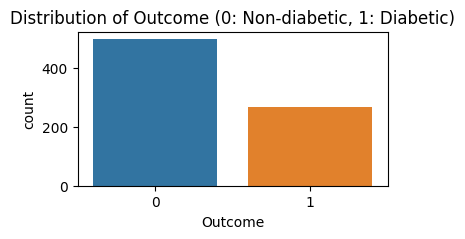

In [7]:
# Distribution of Outcomes
pt.figure(figsize=(4,2))
sb.countplot(data= ds, x = ds['Outcome'])
pt.title("Distribution of Outcome (0: Non-diabetic, 1: Diabetic)")
pt.show()

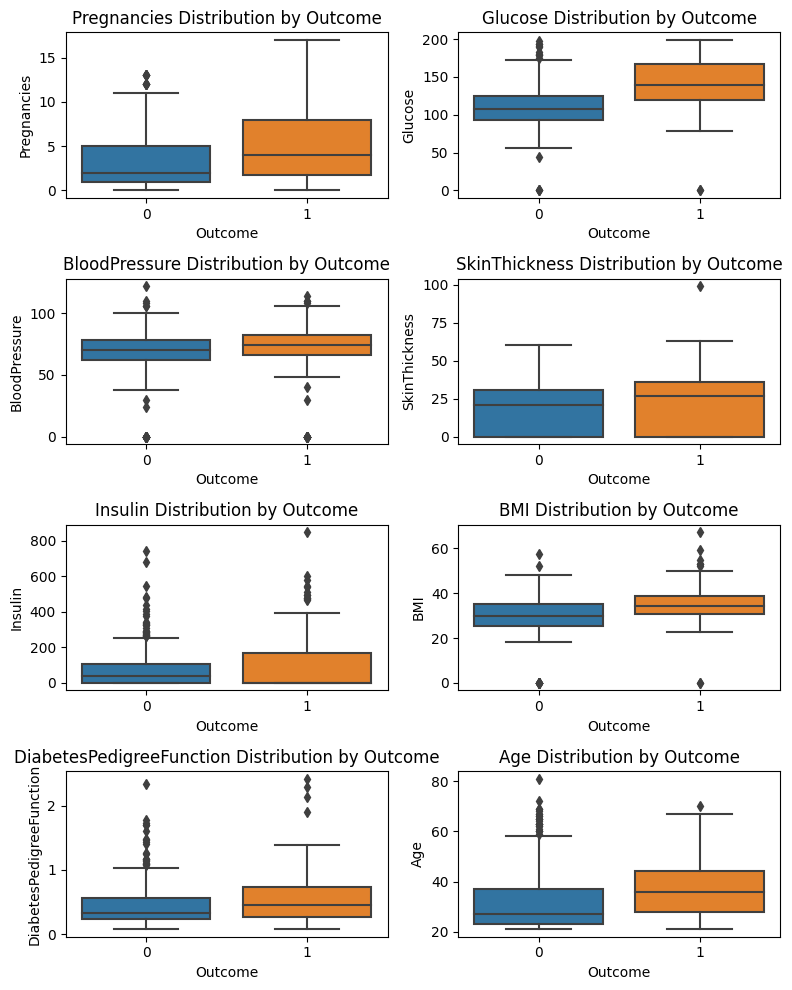

In [8]:
# Boxplot for Various Columns vs Outcome
cols =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
fig,ax = pt.subplots(4,2,figsize=(8,10))
for i,v in enumerate(cols):
    r= i//2 # Using floor division to find Row
    c= i%2 # Using modulus to find column
    sb.boxplot(x='Outcome',y=v,data=ds,ax=ax[r,c])
    ax[r,c].set_title(f"{v} Distribution by Outcome")
    ax[r,c].set_xlabel("Outcome")
    ax[r,c].set_ylabel(v)
pt.tight_layout()
pt.show()

In [9]:
# Removing Outliers using z score
z = zscore(ds)
threshold = 3 # Commonly Use
cds = ds[(z < threshold).all(axis=1)]
print('Initially record',len(ds))
print('Cleaned record',len(cds))
cds.head()

Initially record 768
Cleaned record 729


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [10]:
# Spliting Datasets
sds = cds.sample(frac=1, random_state=45)
df = sds.iloc[:-50] # Selecting all record except last 50
ndf= sds.iloc[-50:] # Selecting last record 50 for later check

# Split the dataset into features (X) and target (y)
x = df.drop('Outcome',axis=1)
y = df['Outcome']

# Spliting for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=45, stratify=y)

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=45)
cv = cross_val_score(dt, x_train, y_train, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv)
print("Mean CV Score:", cv.mean())

Cross-Validation Scores: [0.67889908 0.7706422  0.66972477 0.68518519 0.63888889]
Mean CV Score: 0.6886680258239891


In [11]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_

# Train the best Decision Tree model on the entire training set
best_dt.fit(x_train, y_train)

# Predictions on the test set
y_pred = best_dt.predict(x_test)

# Evalution
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy:{acc:.2f}",f"\nPrecision:{pre:.2f}",f"\nRecall:{rec:.2f}",f"\nF1 Score:{f1:.2f}")

Accuracy:0.74 
Precision:0.62 
Recall:0.61 
F1 Score:0.62


Confusion Matrix:
 [[73 17]
 [18 28]]


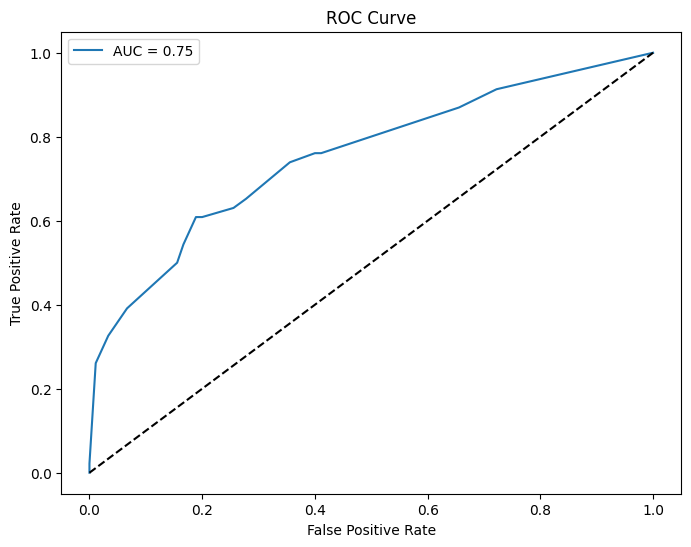

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)

# ROC Curve and AUC
y_prob = best_dt.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
pt.figure(figsize=(8, 6))
pt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
pt.plot([0, 1], [0, 1], 'k--')
pt.xlabel("False Positive Rate")
pt.ylabel("True Positive Rate")
pt.title("ROC Curve")
pt.legend()
pt.show()

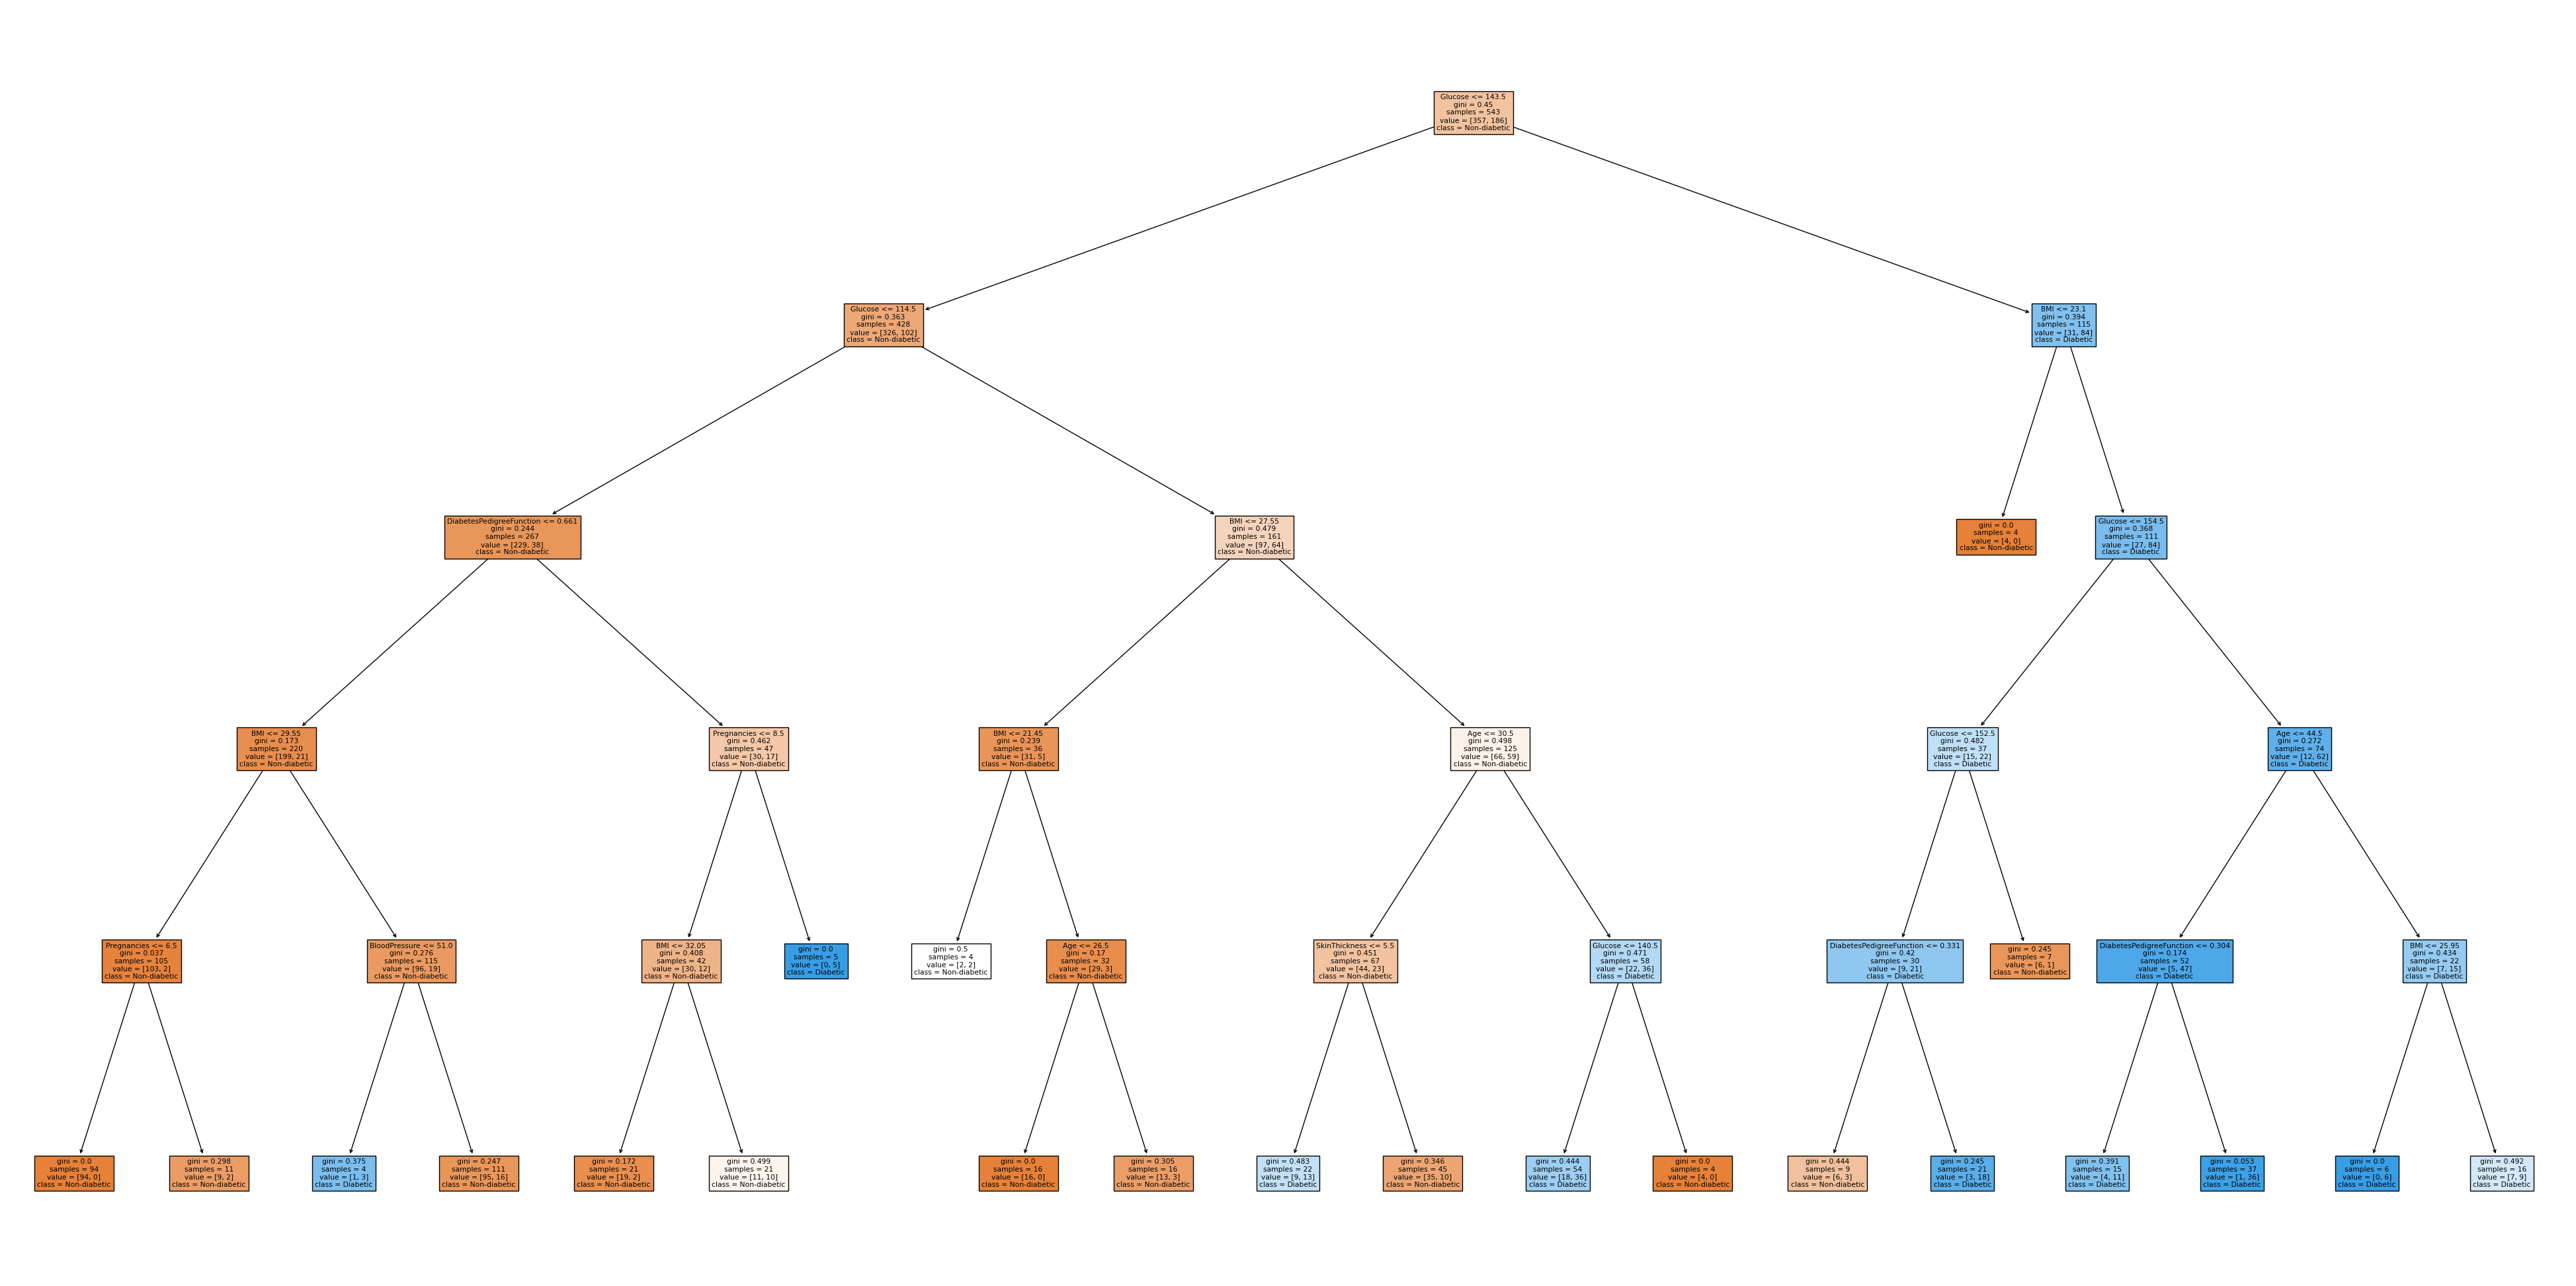

In [13]:
pt.figure(figsize=(50, 25))
plot_tree(best_dt, feature_names=x.columns, class_names=["Non-diabetic", "Diabetic"], filled=True)
pt.show()

## Applying in new dataset

Accuracy:0.74 
Precision:0.62 
Recall:0.61 
F1 Score:0.62
Confusion Matrix:
 [[73 17]
 [18 28]]


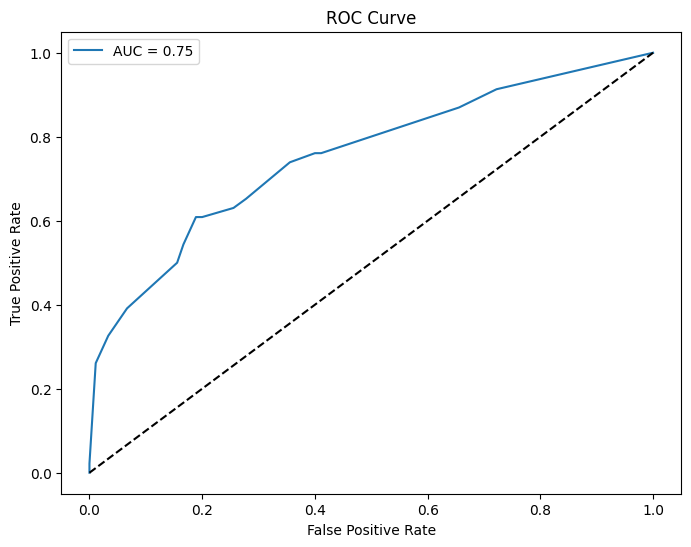

In [14]:
# Split new data into features and target
X_new = ndf.drop('Outcome', axis=1)
y_new = ndf['Outcome']

# Validate on new data
y_pred_new = best_dt.predict(X_new)

# Evalution
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy:{acc:.2f}",f"\nPrecision:{pre:.2f}",f"\nRecall:{rec:.2f}",f"\nF1 Score:{f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)

# ROC Curve and AUC
y_prob = best_dt.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
pt.figure(figsize=(8, 6))
pt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
pt.plot([0, 1], [0, 1], 'k--')
pt.xlabel("False Positive Rate")
pt.ylabel("True Positive Rate")
pt.title("ROC Curve")
pt.legend()
pt.show()

In [15]:
# Split new data into features and target
x_new = ndf.drop('Outcome', axis=1)
y_new = ndf['Outcome']

# Validate on new data
y_pred_new = best_dt.predict(x_new)
accuracy_new = accuracy_score(y_new, y_pred_new)
print(f"Accuracy on New Data: {accuracy_new:.2f}")

Accuracy on New Data: 0.70


In [16]:
# Assess the impact of sensitivity analysis across all features
sensitivity_results = {}
for f in x_new.columns:
    perturbed_values = x_new[f] * 1.1  # Perturb by 10%
    x_perturbed = x_new.copy()
    x_perturbed[f] = perturbed_values
    y_pred_perturbed = best_dt.predict(x_perturbed)
    accuracy_perturbed = accuracy_score(y_new, y_pred_perturbed)
    sensitivity_results[f] = accuracy_perturbed

# Print sensitivity analysis results
print("Sensitivity Analysis Results:")
for feature, accuracy in sensitivity_results.items():
    print(f"{feature}: {accuracy:.2f}")

Sensitivity Analysis Results:
Pregnancies: 0.72
Glucose: 0.74
BloodPressure: 0.72
SkinThickness: 0.70
Insulin: 0.70
BMI: 0.66
DiabetesPedigreeFunction: 0.72
Age: 0.72
